# LoanTap Case Study - Creditworthiness Underwriting Model

---

## 🏢 Business Context

LoanTap is an online platform focused on providing **customized loan products to millennials**. The company aims to innovate in a traditionally dull segment by offering **instant, flexible loans** to salaried professionals and business owners.

LoanTap's data science team is building an **underwriting model** to determine the **creditworthiness of MSMEs and individuals**.

This case study will specifically focus on **Personal Loan underwriting**: Personal loan underwriting is the process where lenders assess the risk of lending money to a borrower by evaluating their creditworthiness, financial stability, and ability to repay the loan.

---

## 📌 Problem Statement

Given a set of attributes for an individual:
- **Should a credit line be extended to them?**
- If yes, **what should the repayment terms be in business recommendations?**

---

## 💼 Financial Instruments by LoanTap

- Personal Loan
- EMI Free Loan
- Personal Overdraft
- Advance Salary Loan

*This case study focuses only on the **Personal Loan** product.*

---

## 📊 Dataset: `LoanTapData.csv`

### 🔑 Data Dictionary

| Column Name            | Description |
|------------------------|-------------|
| loan_amnt              | Listed amount of the loan applied for |
| term                   | Loan repayment period (in months - 36 or 60) |
| int_rate               | Interest Rate on the loan |
| installment            | Monthly installment if the loan is granted |
| grade, sub_grade       | LoanTap assigned loan grades |
| emp_title              | Job title of the borrower |
| emp_length             | Employment length (0–10 years) |
| home_ownership         | Home ownership status |
| annual_inc             | Annual income (self-reported) |
| verification_status    | Verification status of income |
| issue_d                | Month when loan was funded |
| loan_status            | Current status of the loan (**Target variable**) |
| purpose, title         | Reason/title of the loan |
| dti                    | Debt-to-Income ratio |
| earliest_cr_line       | Date of first credit line |
| open_acc               | Number of open credit lines |
| pub_rec                | Derogatory public records |
| revol_bal              | Revolving balance |
| revol_util             | Revolving utilization rate |
| total_acc              | Total number of credit lines |
| initial_list_status    | Initial listing status (W or F) |
| application_type       | Individual or joint application |
| mort_acc               | Number of mortgage accounts |
| pub_rec_bankruptcies   | Number of bankruptcies |
| address                | Borrower’s address |

---

## 🧠 Concepts Used

- Exploratory Data Analysis
- Feature Engineering
- Logistic Regression
- Precision vs Recall Tradeoff

## ✅ What Does ‘Good’ Look Like?

1. **Import the dataset and perform EDA**
2. **Explore how `loan_status` (target variable) is influenced by predictors**
3. **Check correlations**
4. **Feature Engineering**: Create flags for:
   - `pub_rec`
   - `mort_acc`
   - `pub_rec_bankruptcies`
5. **Handle Missing Values & Outliers**
6. **Scaling** using `MinMaxScaler` or `StandardScaler`
7. **Model Building** with `LogisticRegression`
8. **Evaluation**:
   - Classification Report
   - ROC AUC Curve
   - Precision Recall Curve

---

## 🧮 Evaluation Criteria (Total: 100 Points)

### 🔍 EDA (10 points)
- Shape, data types, missing values, summary statistics
- Categorical → Category
- Univariate & Bivariate Analysis (Distribution, Box, Count, Heatmap)
- Insights, outliers, variable relationships

### 🔧 Data Preprocessing (20 points)
- Remove duplicates
- Missing value treatment
- Outlier handling
- Feature engineering
- Final dataset for modeling

### 🧱 Model Building (10 points)
- Logistic Regression
- Model coefficients with column names
- Model interpretation

### 📊 Results Evaluation (50 points)
- ROC AUC Curve (10)
- Precision Recall Curve (10)
- Classification Report (10)
- Tradeoff Questions (10+10):
  - How to reduce false positives
  - Why NPA risk makes false negatives dangerous

### 💡 Actionable Recommendations (10 points)

---

## 📋 Questionnaire (Answer in Markdown/Text Cell)

1. What percentage of customers have fully paid their Loan Amount?
2. Comment about the correlation between `loan_amnt` and `installment`.
3. The majority of people have home ownership as _______.
4. People with grades ‘A’ are more likely to fully pay their loan. (T/F)
5. Name the top 2 afforded job titles.
6. Thinking from a bank’s perspective, which metric should our primary focus be on?
   - ROC AUC
   - Precision
   - Recall
   - F1 Score
7. How does the gap in precision and recall affect the bank?
8. Which were the features that heavily affected the outcome?
9. Will the results be affected by geographical location? (Yes/No)

---

## 💬 Discussion Forum

[Click here to discuss on Scaler Forum](https://www.scaler.com/academy/mentee-dashboard/discussion-forum/p/ask-me-anything-business-case-loantap/21146)

---


In [1]:
# importing the libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
# load the dataset
original_data = pd.read_csv("logistic_regression.csv")
og_cols = original_data.columns.tolist()

In [3]:
data = original_data.copy(deep= True)
data.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [4]:
print(f"No. of rows in the data: {data.shape[0]}")
print(f"No. of columns in the data: {data.shape[1]}")

No. of rows in the data: 396030
No. of columns in the data: 27


**Working on almost 4 lac rows of user's data, and 27 columns**

In [5]:
data.info() # Basic overview of data - Nulls and object types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  

In [6]:
#Check for duplicate values...

data.duplicated().sum()

0

### Null Values Treatment

In [7]:
# Null Count
data.isna().sum()[data.isna().sum() > 0].reset_index()

,index,0
0,emp_title,22927
1,emp_length,18301
2,title,1756
3,revol_util,276
4,mort_acc,37795
5,pub_rec_bankruptcies,535


**These columns have Null values - No we can treat them based on what kind of data they are**
- columns with names or **`emp_title`** we can use forward fill or mode - motto is to distribute equally
- numerical features can be filled with custom value like **`pub_rec_bankruptcies`**, **`mort_acc`** as '0' OR with mean.
- first we need to fill the **`emp_lenght`** with values so that it should be distributed into bins. (we can fill with 0 as we can assume he is a fresher or non employer or with the mean)
- **`emp_title`**, **`title`** are titles or names - having too many unique titles (high-cardinality categorical variables)—like over 40,000 unique values in the title column—can negatively affect a logistic regression model. so we can easily drop them

In [8]:
data.drop(labels= ['emp_title', 'title'], axis= 1, inplace= True)

data.isna().sum()[data.isna().sum() > 0].reset_index()

,index,0
0,emp_length,18301
1,revol_util,276
2,mort_acc,37795
3,pub_rec_bankruptcies,535


In [9]:
null_cols = list(data.isna().sum()[data.isna().sum() > 0].index)
data[null_cols].head()

,emp_length,revol_util,mort_acc,pub_rec_bankruptcies
0,10+ years,41.8,0.0,0.0
1,4 years,53.3,3.0,0.0
2,< 1 year,92.2,0.0,0.0
3,6 years,21.5,0.0,0.0
4,9 years,69.8,1.0,0.0


**Below process takes a lot of time - we can drop this feature and continue further since it is not much useful for building a model**

In [10]:
data[['mort_acc', 'pub_rec_bankruptcies']]= data[['mort_acc', 'pub_rec_bankruptcies']].fillna(0)

data[['mort_acc', 'pub_rec_bankruptcies']].isna().sum()

mort_acc                0
pub_rec_bankruptcies    0
dtype: int64

<Axes: xlabel='revol_util'>

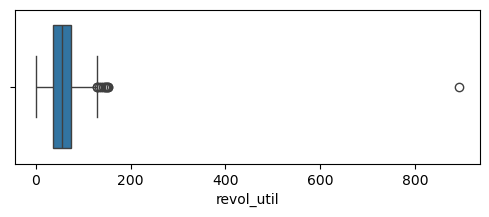

In [11]:
plt.figure(figsize = (6, 2))
sns.boxplot(data["revol_util"], orient= "h")

In [12]:
## just one value that is very far from away - let's just remove it OR we can use capping method

q1 = data["revol_util"].quantile(0.25)
q3 = data["revol_util"].quantile(0.75)
iqr = q3 - q1

upper_bnd = q3 + 1.5*iqr
lower_bnd = q1 - 1.5*iqr

data[data["revol_util"] > upper_bnd][['loan_amnt', 'term', 'grade', 'emp_length', 'annual_inc','revol_util']]

,loan_amnt,term,grade,emp_length,annual_inc,revol_util
16793,18000.0,60 months,D,8 years,136000.0,129.4
65687,10000.0,36 months,C,10+ years,91000.0,150.7
82600,12000.0,60 months,D,NaN,45600.0,152.5
108246,10000.0,36 months,D,2 years,60000.0,136.7
137211,3500.0,36 months,B,10+ years,45000.0,892.3
153970,12550.0,60 months,D,4 years,30000.0,129.5
165111,12600.0,36 months,A,8 years,96011.0,146.1
211426,9175.0,36 months,D,6 years,45000.0,132.1
296174,12000.0,36 months,D,5 years,200000.0,140.4
312268,8000.0,36 months,C,4 years,105000.0,145.8


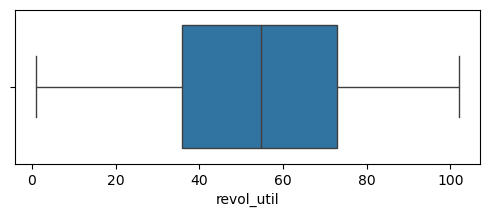

In [13]:
lower_cap = data['revol_util'].quantile(0.01)
upper_cap = data['revol_util'].quantile(0.999)

data['revol_util']= np.clip(data['revol_util'], lower_cap, upper_cap) # cap the outliers to max upper bouders below the upper wick

data['revol_util'].fillna(data['revol_util'].mean(), inplace=True) # fill Null values with mean

# plot the feature to check what we have done
plt.figure(figsize = (6, 2))
sns.boxplot(data["revol_util"], orient= "h")
plt.show()

In [14]:
## emp lenght - check correlation with loanstatus
data['emp_length'].value_counts()

emp_length
10+ years    126041
2 years       35827
< 1 year      31725
3 years       31665
5 years       26495
1 year        25882
4 years       23952
6 years       20841
7 years       20819
8 years       19168
9 years       15314
Name: count, dtype: int64

In [15]:
# from sklearn.preprocessing import LabelEncoder
# from scipy.stats import chi2_contingency

# # Example: Apply label encoding on categorical features
# le = LabelEncoder()
# df['emp_title'] = le.fit_transform(df['emp_title'])

# # Now check correlation with 'Loan_Status'
# contingency_table = pd.crosstab(df['emp_title'], df['loan_status'])dd
# chi2, p, dof, expected = chi2_contingency(contingency_table)

# print(f"Chi-Square Test Statistic: {chi2}")
# print(f"P-value: {p}")

In [16]:
def column_summary(data, col, uni_len=13):
    """
    Column Summarizer Utility
    
    Displays key statistics for column in the DataFrame:
    - Column name and data type
    - Null value count and percentage
    - Number of unique values
    - Value counts (if column is categorical or has unique values <= uni_lens)
    - Descriptive statistics for numerical columns
    
    Parameters:
    - data: Pandas DataFrame
    - col: Column name (string)
    - uni_lens: Threshold for displaying value counts (int)
    """
    
    print("##" * 40)
    print(f"🔹 Column Name       : {col}")
    print(f"🔸 Data Type         : {data[col].dtype}")
    
    total_null = data[col].isnull().sum()
    null_percent = (total_null / len(data)) * 100
    print(f"❌ Total Null Values : {total_null} ({null_percent:.2f}%)")
    
    unique_vals = data[col].nunique()
    print(f"🔢 Unique Values     : {unique_vals}")
    
    # Display unique values and value counts if categorical or low cardinality
    if data[col].dtype == 'object' and unique_vals < uni_len:
        print(f"\n📊 Value Counts:\n{data[col].value_counts(dropna=False)}")
        
    
    print("##" * 40 + "\n")

# Apply it to all columns
for col in data.columns:
    column_summary(data, col, uni_len=10)


################################################################################
🔹 Column Name       : loan_amnt
🔸 Data Type         : float64
❌ Total Null Values : 0 (0.00%)
🔢 Unique Values     : 1397
################################################################################

################################################################################
🔹 Column Name       : term
🔸 Data Type         : object
❌ Total Null Values : 0 (0.00%)
🔢 Unique Values     : 2

📊 Value Counts:
term
36 months    302005
60 months     94025
Name: count, dtype: int64
################################################################################

################################################################################
🔹 Column Name       : int_rate
🔸 Data Type         : float64
❌ Total Null Values : 0 (0.00%)
🔢 Unique Values     : 566
################################################################################

#######################################################################

**Let's focus on Categorical Cols first then we will goto numerical columns**
1. emp_title, emp_length having few null values of 5.79% and 6.46% respectively
2. grade has 7 categoies ranging from A to G and subGrade has 35 Unique values
3. **Nulls**: Emp title, mort_acc and emp_length, pub_rec_bankruptcies, title(just a few) have ~5% negative values.
4. House owner ships has values or categories like Other, None, Any - Need more info
5. Verification_status: contains Verified and Source Verified - Is it same or different?
6. loan_status: It will be our target variable whether is he able to pay full loan or not.
7. Loan is taken for 14 different purposes - two of them being for finance related and others personal spedings



## Feature Engineering & Descriptive Analysis - EDA

In [17]:
## Extract only numbers from the term

data['term']= data['term'].str.strip()
data['term']= data['term'].str[:2].astype(int)
data['term'].value_counts()

term
36    302005
60     94025
Name: count, dtype: int64

**Employment length - Feature Engineering and Null treatment**

In [18]:
data['emp_length'] = original_data['emp_length']
data['emp_length'].isna().sum()

18301

In [19]:
## null treatment since there are many null values in the feature we can assume they are fresher or unemployed - so can impute with 0.

data['emp_length']= data['emp_length'].fillna('0 years')
print (f"Total null values in the col emp_length is {data['emp_length'].isna().sum()}.")

Total null values in the col emp_length is 0.


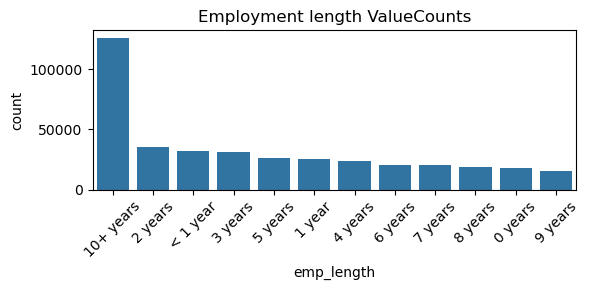

In [20]:
plt.figure(figsize= (6, 3))
plt.title("Employment length ValueCounts")
sns.barplot(data['emp_length'].value_counts())
plt.xticks(rotation= 45)
plt.tight_layout()

**we have data till 10+ years if just take years from them it might get biased towards the 10 year and ignore if people with years more than 10**<br>
**Instead we can create bins and then do the label encoding or target encoding**

In [21]:
## categorizing emp based on their experience

def clean_emp_length(val):
    if pd.isnull(val):
        return np.nan
    if '< 1' in val: # combine < 1 with 1 to add in fresher bin
        return 1
    elif '10+' in val:
        return 10
    else:
        return int(val.strip().split()[0])
        
## emp lenght - check correlation with loanstatus as it has presence of null values

data['emp_length_clean'] = data['emp_length'].apply(clean_emp_length)

bins = [-1, 0, 1, 2, 5, 9, 10]
labels = ['Inactive', 'Fresher', 'Junior', 'Mid', 'Senior', 'Legend']

data['emp_level'] = pd.cut(data['emp_length_clean'], bins=bins, labels=labels, include_lowest=True)


data[['emp_length', 'emp_length_clean', 'emp_level']].value_counts().reset_index()


,emp_length,emp_length_clean,emp_level,count
0,10+ years,10,Legend,126041
1,2 years,2,Junior,35827
2,< 1 year,1,Fresher,31725
3,3 years,3,Mid,31665
4,5 years,5,Mid,26495
5,1 year,1,Fresher,25882
6,4 years,4,Mid,23952
7,6 years,6,Senior,20841
8,7 years,7,Senior,20819
9,8 years,8,Senior,19168


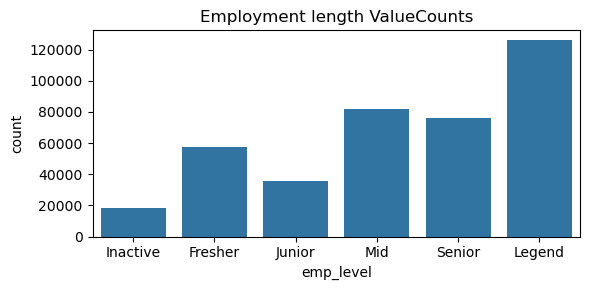

In [22]:
plt.figure(figsize= (6, 3))
plt.title("Employment length ValueCounts")
sns.barplot(data['emp_level'].value_counts())
# plt.xticks(rotation= 45)
plt.tight_layout()

**Employees with experience more than 10 years, after them 2-5 years of experienced ones took most number of loans**

In [23]:
# Verification status: combime source verified and verified and assign 0 and 1

data["verification_status"] = data['verification_status'].replace({
    "Verified": 1,
    "Source Verified": 1,
    "Not Verified": 0
})
data["verification_status"].astype("category")
data["verification_status"].value_counts()

verification_status
1    270948
0    125082
Name: count, dtype: int64

In [24]:
# Loan status - since it is the target var - let's change to binary values

data['loan_status'] = data['loan_status'].replace({
    "Fully Paid": 1,
    "Charged Off" : 0
})
data['loan_status'] = data['loan_status'].astype("category")
data['loan_status'].value_counts()

loan_status
1    318357
0     77673
Name: count, dtype: int64

In [25]:
## initial_list_status - Convert it into binary w(whole): 1 and f(fraction): 0

data['initial_list_status'] = data['initial_list_status'].replace({
    "w": 1,
    "f" : 0
})
data['initial_list_status'] = data['initial_list_status'].astype("category")
data['initial_list_status'].value_counts()

initial_list_status
0    238066
1    157964
Name: count, dtype: int64

In [26]:
# Converting issue_d into time data frame
data["issue_d"]= pd.to_datetime(data["issue_d"])
data["earliest_cr_line"]= pd.to_datetime(data["earliest_cr_line"])

data[["issue_d", "earliest_cr_line"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 2 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   issue_d           396030 non-null  datetime64[ns]
 1   earliest_cr_line  396030 non-null  datetime64[ns]
dtypes: datetime64[ns](2)
memory usage: 6.0 MB


In [27]:
data[["issue_d", "earliest_cr_line"]].head()

,issue_d,earliest_cr_line
0,2015-01-01,1990-06-01
1,2015-01-01,2004-07-01
2,2015-01-01,2007-08-01
3,2014-11-01,2006-09-01
4,2013-04-01,1999-03-01


**`issue_d`**: it is the year when the loan is issued to the person

**`earliest_cr_line`**: it tells about the person when the person got issued his first credit card - basically credit age - can be calculated by subtracting current year from earliest_cr_line_year

In [28]:
# data["issue_d_month"] = data["issue_d"].dt.month # Since we do not need months as they are irrelevant
data["issue_d_year"] = data["issue_d"].dt.year

# data["earliest_cr_line_month"] = data["earliest_cr_line"].dt.month
data["earliest_cr_line_year"] = data["earliest_cr_line"].dt.year


data[["issue_d", "issue_d_year", "earliest_cr_line", "earliest_cr_line_year"]].head()

,issue_d,issue_d_year,earliest_cr_line,earliest_cr_line_year
0,2015-01-01,2015,1990-06-01,1990
1,2015-01-01,2015,2004-07-01,2004
2,2015-01-01,2015,2007-08-01,2007
3,2014-11-01,2014,2006-09-01,2006
4,2013-04-01,2013,1999-03-01,1999


In [29]:
data[["issue_d", "issue_d_year", "earliest_cr_line", "earliest_cr_line_year"]].nunique()

issue_d                  115
issue_d_year              10
earliest_cr_line         684
earliest_cr_line_year     65
dtype: int64

In [30]:
## Getting credit age by subtracting current year from earliest_cr_line_year
from datetime import datetime as dt

curr_year = dt.now().year
data['credit_age'] = curr_year - data['earliest_cr_line_year']

data['credit_age'].head()

0    35
1    21
2    18
3    19
4    26
Name: credit_age, dtype: int32

In [31]:
data['address'].head()

0       0174 Michelle Gateway\r\nMendozaberg, OK 22690
1    1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113
2    87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113
3              823 Reid Ford\r\nDelacruzside, MA 00813
4               679 Luna Roads\r\nGreggshire, VA 11650
Name: address, dtype: object

In [32]:
# GETTING JUST THE PIN CODE FROM THE ADDRESS AS TOTAL ADDRESS IS IRRELEVANT

data['pincode']= data['address'].str[-6:].astype("object")
data['pincode'].value_counts()

pincode
70466    56985
30723    56546
22690    56527
48052    55917
00813    45824
29597    45471
05113    45402
11650    11226
93700    11151
86630    10981
Name: count, dtype: int64

In [33]:
## we can drop the address now

data.drop(["address"],axis= 1, inplace= True)
data.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'dti', 'earliest_cr_line',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'application_type', 'mort_acc',
       'pub_rec_bankruptcies', 'emp_length_clean', 'emp_level', 'issue_d_year',
       'earliest_cr_line_year', 'credit_age', 'pincode'],
      dtype='object')

#### If a applicant has any pub_rec, mort_acc, pub_rec_bankruptcies then it is a negative sign even one of then is more than 0 or 1. in order to make it more robust we can convert them into binary values.

In [34]:
cols = ['pub_rec', 'mort_acc', "pub_rec_bankruptcies"]
data[cols].nunique()

pub_rec                 20
mort_acc                33
pub_rec_bankruptcies     9
dtype: int64

In [35]:
## data['pub_rec']:  Derogatory public records are those that contain negative information such as bankruptcies, suits, and liens

data['pub_rec'][data['pub_rec'] > 0] = 1
data['pub_rec'].value_counts().reset_index()

,pub_rec,count
0,0.0,338272
1,1.0,57758


In [36]:
data['mort_acc'][data['mort_acc'] > 0] = 1
data['mort_acc'].value_counts()

mort_acc
1.0    218458
0.0    177572
Name: count, dtype: int64

In [37]:
data['pub_rec_bankruptcies'][data['pub_rec_bankruptcies'] > 0] = 1
data['pub_rec_bankruptcies'].value_counts()

pub_rec_bankruptcies
0.0    350915
1.0     45115
Name: count, dtype: int64

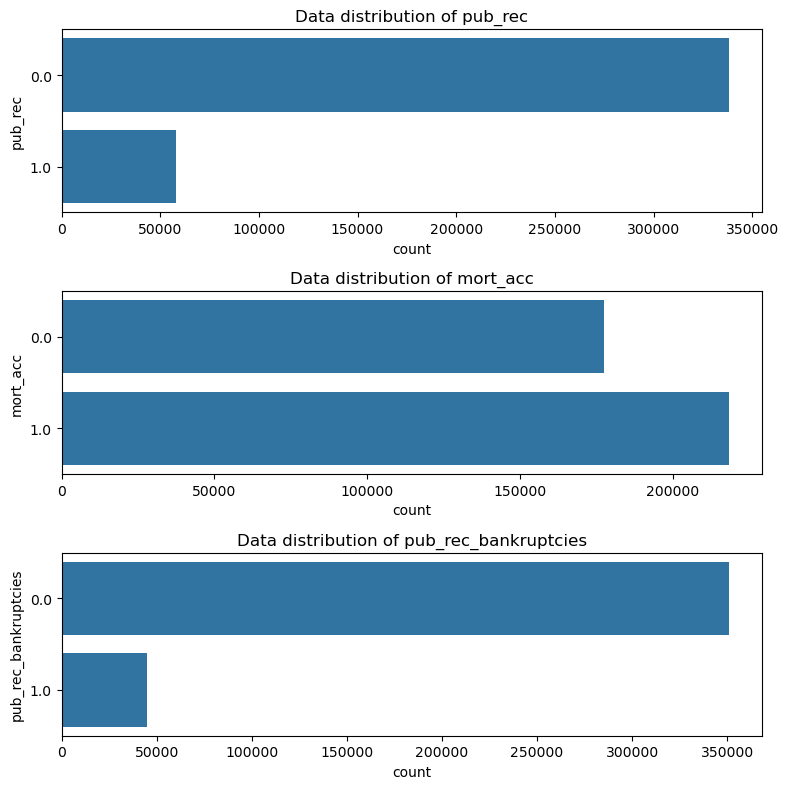

In [38]:
plt.figure(figsize= (8, 8))

for i, col in enumerate(cols, 1):
    plt.subplot(3, 1, i)
    sns.barplot(data[col].value_counts().reset_index(), y =col, x= "count", orient= "h")
    plt.title(f"Data distribution of {col}")

plt.tight_layout()
plt.show()

In [39]:
data['home_ownership'].value_counts()

home_ownership
MORTGAGE    198348
RENT        159790
OWN          37746
OTHER          112
NONE            31
ANY              3
Name: count, dtype: int64

**`home_ownership` has columns that has very less count such as None and any - we can either drop them or convert them into other category**

In [40]:
data['home_ownership']= data['home_ownership'].replace({
    'NONE': 'OTHER',
    'ANY': 'OTHER'
})
data['home_ownership'].value_counts()

home_ownership
MORTGAGE    198348
RENT        159790
OWN          37746
OTHER          146
Name: count, dtype: int64

In [41]:
## Purpose columns

def encode_purpose(purpose):
    if purpose in ['debt_consolidation', 'credit_card']:
        return 1  # Financial purpose
    else:
        return 0  # Other / Personal

data['purpose_binary'] = data['purpose'].apply(encode_purpose)

In [42]:
data.isna().sum()

loan_amnt                0
term                     0
int_rate                 0
installment              0
grade                    0
sub_grade                0
emp_length               0
home_ownership           0
annual_inc               0
verification_status      0
issue_d                  0
loan_status              0
purpose                  0
dti                      0
earliest_cr_line         0
open_acc                 0
pub_rec                  0
revol_bal                0
revol_util               0
total_acc                0
initial_list_status      0
application_type         0
mort_acc                 0
pub_rec_bankruptcies     0
emp_length_clean         0
emp_level                0
issue_d_year             0
earliest_cr_line_year    0
credit_age               0
pincode                  0
purpose_binary           0
dtype: int64

--- 
**`application_type`**
- can modify this features since there are three values in the feature 1. Joint 2. individual 3. direct pay we can merge into individual as direct pay mostly comes under individual application type only.
- Then can convert it into binary variables

In [43]:
data['application_type'] = original_data['application_type']

In [44]:
# Verification status: combime source verified and verified and assign 0 and 1

data["application_type"] = data['application_type'].replace({
    "JOINT": 0,
    "INDIVIDUAL": 1,
    "DIRECT_PAY": 1
})
data["application_type"].astype("category")
data["application_type"].value_counts()

application_type
1    395605
0       425
Name: count, dtype: int64

In [45]:
## the data is heavily imbalance less than 1% we can drop this col but check 
data[['application_type', 'loan_status']].corr() ## very very very low correlation almost neutral - there is no effect of this feature on loan_status

,application_type,loan_status
application_type,1.000000,-0.005702
loan_status,-0.005702,1.000000


In [46]:
data.describe(include= "object" )

,grade,sub_grade,emp_length,home_ownership,purpose,pincode
count,396030,396030,396030,396030,396030,396030
unique,7,35,12,4,14,10
top,B,B3,10+ years,MORTGAGE,debt_consolidation,70466
freq,116018,26655,126041,198348,234507,56985


In [47]:
data.describe()

,loan_amnt,term,int_rate,installment,annual_inc,verification_status,issue_d,dti,earliest_cr_line,open_acc,...,revol_util,total_acc,application_type,mort_acc,pub_rec_bankruptcies,emp_length_clean,issue_d_year,earliest_cr_line_year,credit_age,purpose_binary
count,396030.000000,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.00000,396030,396030.000000,396030,396030.000000,...,396030.000000,396030.000000,396030.000000,396030.000000,396030.000000,396030.000000,396030.000000,396030.000000,396030.000000,396030.000000
mean,14113.888089,41.698053,13.639400,431.849698,7.420318e+04,0.68416,2014-02-02 15:57:58.045602560,17.379514,1998-05-03 09:34:15.062495488,11.311153,...,53.791993,25.414744,0.998927,0.551620,0.113918,5.744257,2013.629074,1997.857667,27.142333,0.801773
min,500.000000,36.000000,5.320000,16.080000,0.000000e+00,0.00000,2007-06-01 00:00:00,0.000000,1944-01-01 00:00:00,0.000000,...,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,2007.000000,1944.000000,12.000000,0.000000
25%,8000.000000,36.000000,10.490000,250.330000,4.500000e+04,0.00000,2013-05-01 00:00:00,11.280000,1994-10-01 00:00:00,8.000000,...,35.900000,17.000000,1.000000,0.000000,0.000000,2.000000,2013.000000,1994.000000,22.000000,1.000000
50%,12000.000000,36.000000,13.330000,375.430000,6.400000e+04,1.00000,2014-04-01 00:00:00,16.910000,1999-09-01 00:00:00,10.000000,...,54.800000,24.000000,1.000000,1.000000,0.000000,6.000000,2014.000000,1999.000000,26.000000,1.000000
75%,20000.000000,36.000000,16.490000,567.300000,9.000000e+04,1.00000,2015-03-01 00:00:00,22.980000,2003-04-01 00:00:00,14.000000,...,72.900000,32.000000,1.000000,1.000000,0.000000,10.000000,2015.000000,2003.000000,31.000000,1.000000
max,40000.000000,60.000000,30.990000,1533.810000,8.706582e+06,1.00000,2016-12-01 00:00:00,9999.000000,2013-10-01 00:00:00,90.000000,...,102.000000,151.000000,1.000000,1.000000,1.000000,10.000000,2016.000000,2013.000000,81.000000,1.000000
std,8357.441341,10.212038,4.472157,250.727790,6.163762e+04,0.46485,NaN,18.019092,NaN,5.137649,...,24.377588,11.886991,0.032741,0.497329,0.317712,3.660192,1.481725,7.198387,7.198387,0.398665


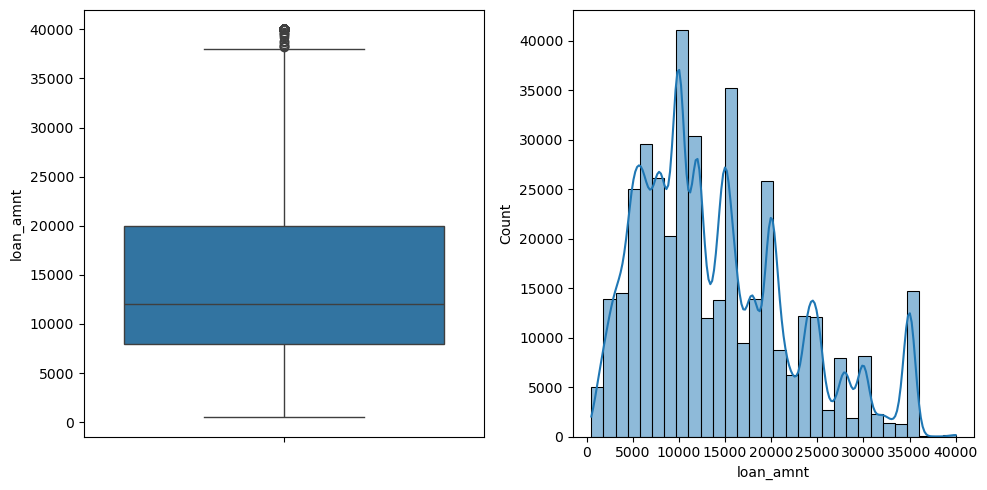

In [48]:
plt.figure(figsize= (10, 5))

plt.subplot(1, 2, 1)
sns.boxplot(data['loan_amnt'])

plt.subplot(1, 2, 2)
sns.histplot(data['loan_amnt'], kde= True, bins= 30)

plt.tight_layout()
plt.show()

### **Descriptive Statistics Summary**

#### Loan and Income-Related Features
- **`loan_amnt`** ranges from **₹500 to ₹40,000**, with a **median** of ₹12,000.  
  → Most borrowers request **moderate loan amounts**, indicating conservative borrowing behavior.
- **`annual_inc`** has a **mean of ~₹74K**, but the **maximum is ₹8.7 million**, suggesting the presence of **extreme outliers**.
- **`installment`** is tightly coupled with `loan_amnt` (range: ₹16 to ₹1,534), with a median of ₹375/month.

#### Interest and Debt Metrics
- **`int_rate`** varies from **5.32% to 30.99%**, with a **mean of ~13.6%**, suggesting a **broad risk range** of borrowers.
- **`dti` (Debt-to-Income Ratio)** ranges from 0 to a **very high value of 9999**, which is likely an **invalid or imputed value**.
  - **Median DTI** is around **16.9**, which is within industry-acceptable limits.
  - **Action**: Filter or impute high DTI outliers (above 100 likely invalid).

#### Credit History & Behavior
- **`open_acc`** has a **mean of ~11**, maxing out at 90 open accounts — high but plausible for affluent or heavily leveraged individuals.
- **`total_acc`** (all historical accounts) ranges up to 151, with a median of 24 — showing a **typical credit history depth**.
- **`revol_bal`** (revolving balance) maxes out at **₹1.74 million**, with a **median of ₹11K**, again suggesting outliers.
- **`revol_util`** (credit utilization rate) has a median around **54.8%**, indicating **moderate to high utilization** among borrowers.

#### Public Records & Risk Indicators
- **`pub_rec`** and **`pub_rec_bankruptcies`** are mostly **zero** across the dataset:
  - Mean of `pub_rec` is 0.17; **most people have clean records**.
  - **Max values (86 and 8 respectively)** point to **very risky borrowers** who should be flagged or excluded.
- **`mort_acc`** has a **median of 1**, showing **moderate home loan penetration** in the dataset.

---

### Key Observations
- **Missing Data**: Present in `revol_util`, `mort_acc`, and `pub_rec_bankruptcies` — needs imputation.
- **Outliers Detected**:
  - `annual_inc`, `dti`, `pub_rec`, `revol_bal`, `pub_rec_bankruptcies`
  - Treat these before scaling and modeling.
- **Feature Scaling**: Required due to wide value range in features like `revol_bal`, `loan_amnt`, `annual_inc`, `installment`.
- **Skewed Distribution**: Income and installment-related features likely **right-skewed**, suggesting **log transformation** may help.



In [49]:
cat_cols = [col for col in data.columns if data[col].dtype == 'object' or data[col].nunique() <= 11]
print(cat_cols, len(cat_cols))

['term', 'grade', 'sub_grade', 'emp_length', 'home_ownership', 'verification_status', 'loan_status', 'purpose', 'pub_rec', 'initial_list_status', 'application_type', 'mort_acc', 'pub_rec_bankruptcies', 'emp_length_clean', 'emp_level', 'issue_d_year', 'pincode', 'purpose_binary'] 18


In [50]:
data.nunique()

loan_amnt                 1397
term                         2
int_rate                   566
installment              55706
grade                        7
sub_grade                   35
emp_length                  12
home_ownership               4
annual_inc               27197
verification_status          2
issue_d                    115
loan_status                  2
purpose                     14
dti                       4262
earliest_cr_line           684
open_acc                    61
pub_rec                      2
revol_bal                55622
revol_util                1068
total_acc                  118
initial_list_status          2
application_type             2
mort_acc                     2
pub_rec_bankruptcies         2
emp_length_clean            11
emp_level                    6
issue_d_year                10
earliest_cr_line_year       65
credit_age                  65
pincode                     10
purpose_binary               2
dtype: int64

In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 31 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   loan_amnt              396030 non-null  float64       
 1   term                   396030 non-null  int32         
 2   int_rate               396030 non-null  float64       
 3   installment            396030 non-null  float64       
 4   grade                  396030 non-null  object        
 5   sub_grade              396030 non-null  object        
 6   emp_length             396030 non-null  object        
 7   home_ownership         396030 non-null  object        
 8   annual_inc             396030 non-null  float64       
 9   verification_status    396030 non-null  int64         
 10  issue_d                396030 non-null  datetime64[ns]
 11  loan_status            396030 non-null  category      
 12  purpose                396030 non-null  obje

In [52]:
# num_cols = ["loan_amnt", "int_rate", "int_rate", "annual_inc", "dti", "open_acc", "revol_bal", 'pub_rec_bankruptcies']

num_cols = [col for col in data.columns if data[col].dtype in ('float', 'int')]
num_cols= num_cols[:-3] # removing last month, year
# num_cols.remove('emp_length_clean')
num_cols.remove('term')
num_cols.remove('pub_rec')
num_cols.remove('mort_acc')
num_cols.remove('pub_rec_bankruptcies')
# num_cols.remove('pub_rec_bankruptcies')
num_cols

['loan_amnt',
 'int_rate',
 'installment',
 'annual_inc',
 'dti',
 'open_acc',
 'revol_bal',
 'revol_util',
 'total_acc']

In [53]:

def hist_box_plot(data, cols):
    colors = sns.color_palette("Set2", len(cols))
    n = len(cols)
    plt.figure(figsize=(15, 5*n))
    # if there are three numerical columns, total 6 positions
   
    for i, col in enumerate(cols):
        plt.subplot(n, 2, 2 * i + 1)
        sns.histplot(data[col], kde=True, bins=30, color=colors[i])
        plt.title(f"Histogram & KDE of {col}")
    
        plt.subplot(n, 2, 2 * i + 2)
        sns.boxplot(x=data[col], color=colors[i])
        plt.title(f"Box Plot of {col}")
    
    plt.tight_layout()
    plt.show()

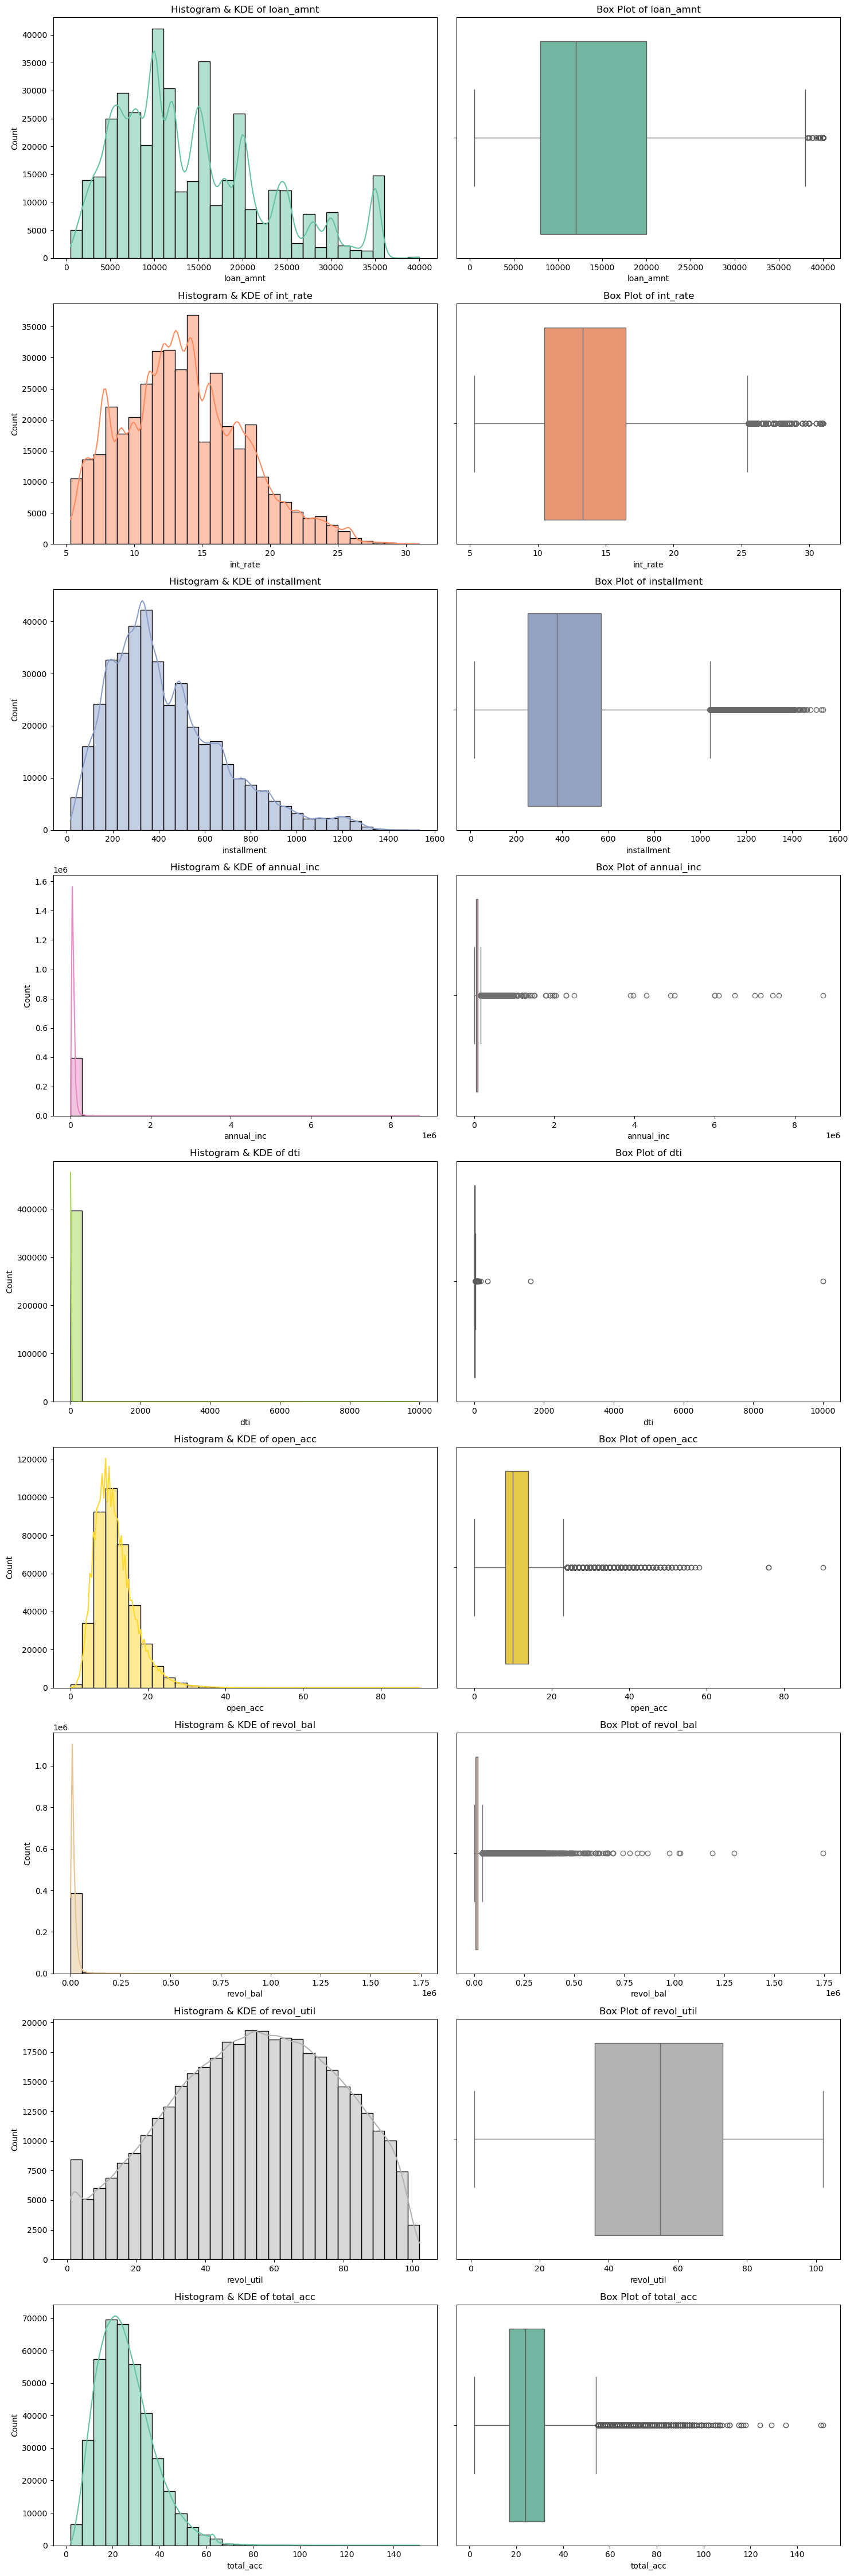

In [54]:
hist_box_plot(data, num_cols)

**There are many numerical features with outliers and data that is skewed because of outliers other wise they are Normally distributed**<br>
**But we cannot remove them as they are valuable features we need the person with highest salaries, interest rates, salary etc**

## Target Variable EDA
**Check how much target variable (Loan_Status) depends on different predictor variables (Use count plots, box plots, heat maps etc)**

In [55]:
values= data['loan_status'].value_counts().reset_index()
values

,loan_status,count
0,1,318357
1,0,77673


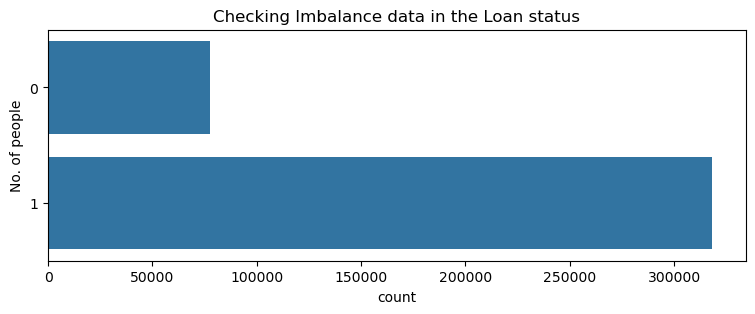

In [56]:
plt.figure(figsize= (9, 3))
sns.barplot(values, y ='loan_status', x= "count", orient= "h")
plt.title("Checking Imbalance data in the Loan status")
plt.ylabel("No. of people")

plt.show()

**There is a lot of imbalance in the data especially in the target feature** - **we can impute data using KNN algorithm**

In [57]:
data[['loan_status', 'annual_inc']].corr()

,loan_status,annual_inc
loan_status,1.000000,0.053432
annual_inc,0.053432,1.000000


### **Check how much target variable (Loan_Status) depends on different predictor variables (Use count plots, box plots, heat maps etc)**

In [58]:
cat_cols

['term',
 'grade',
 'sub_grade',
 'emp_length',
 'home_ownership',
 'verification_status',
 'loan_status',
 'purpose',
 'pub_rec',
 'initial_list_status',
 'application_type',
 'mort_acc',
 'pub_rec_bankruptcies',
 'emp_length_clean',
 'emp_level',
 'issue_d_year',
 'pincode',
 'purpose_binary']

**1: Fully paid - loan was cleared by the applicant**<br>
**0: Charged OFF - loan was charged as the applicant was unable to pay**

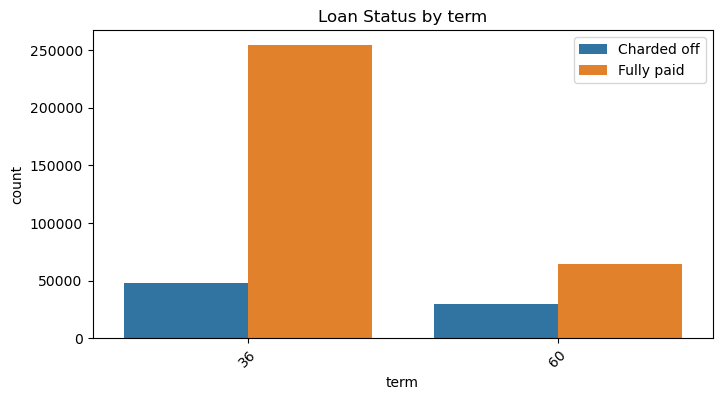

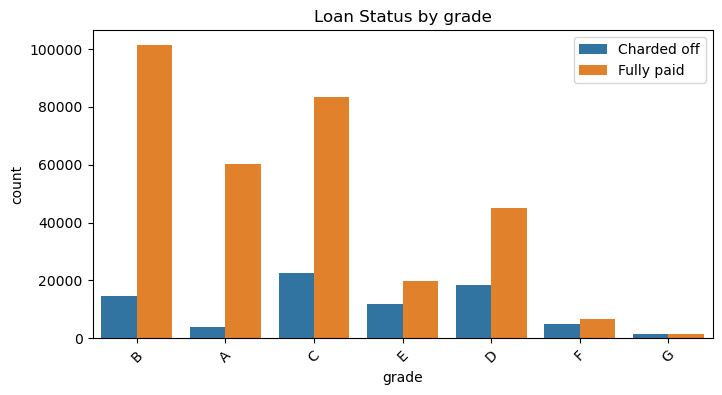

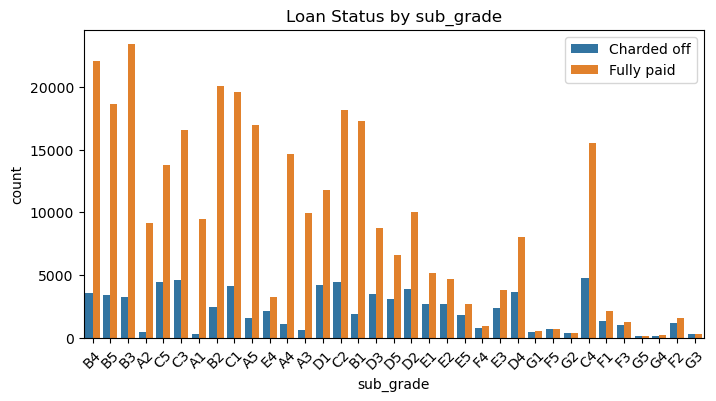

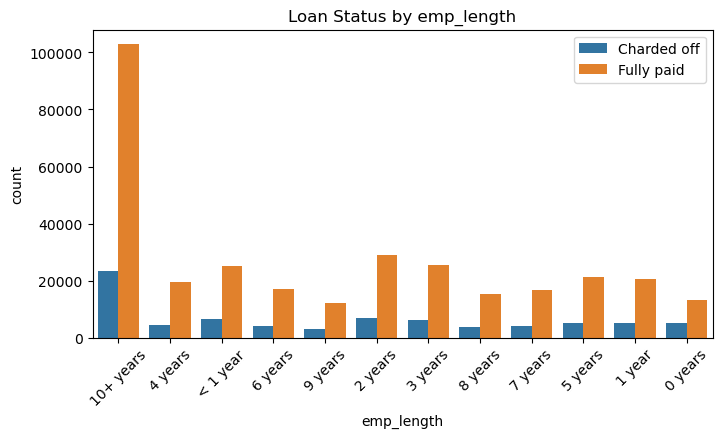

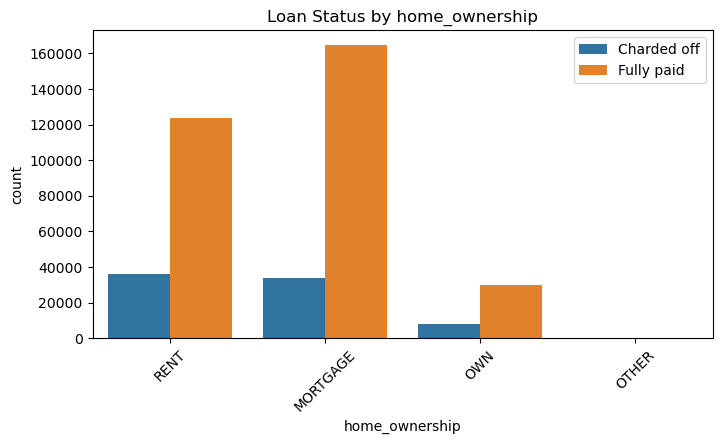

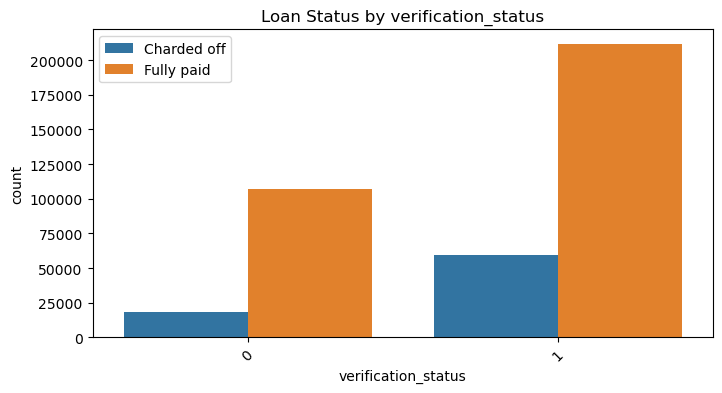

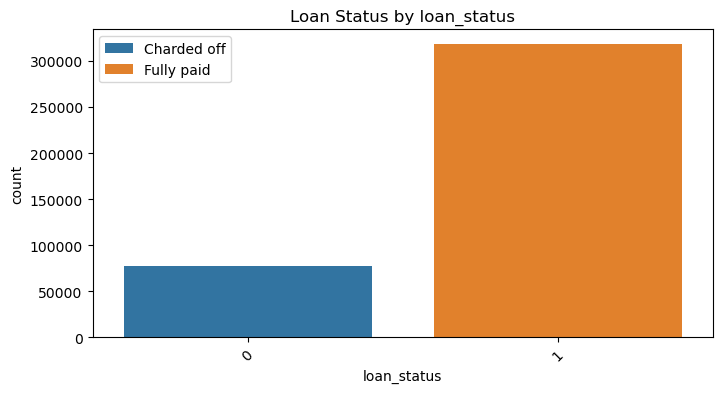

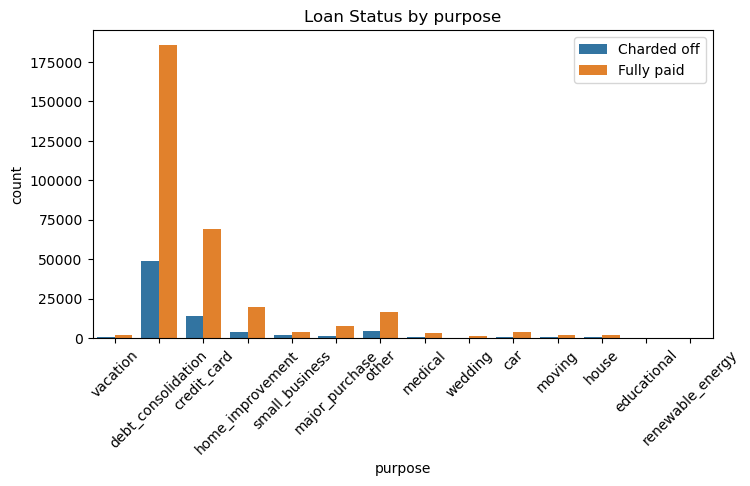

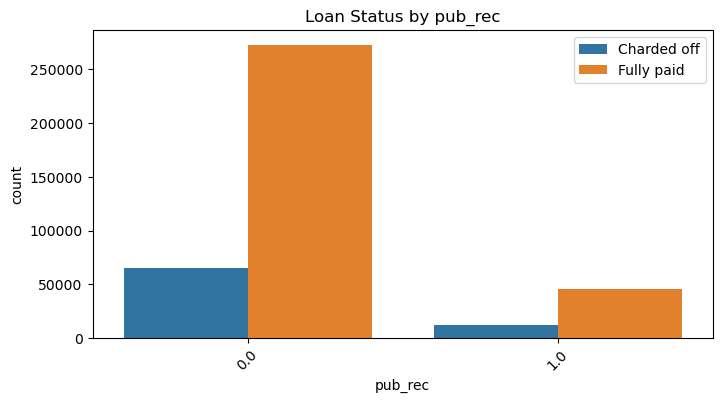

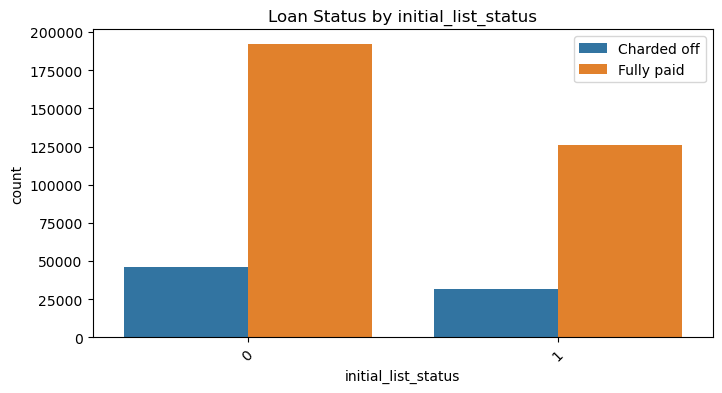

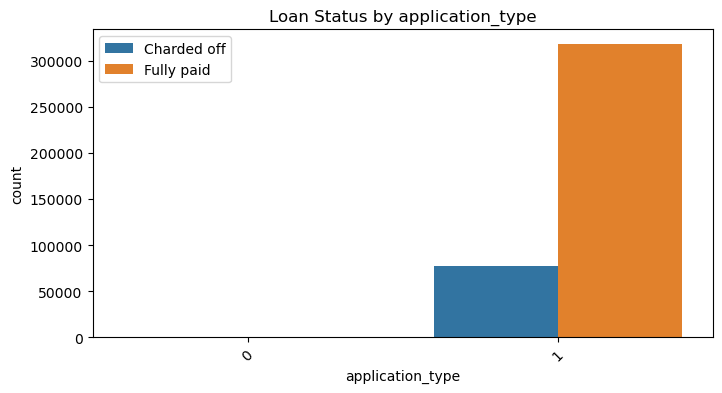

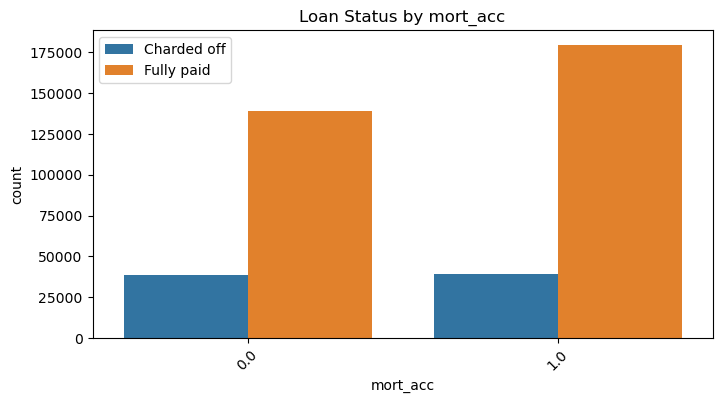

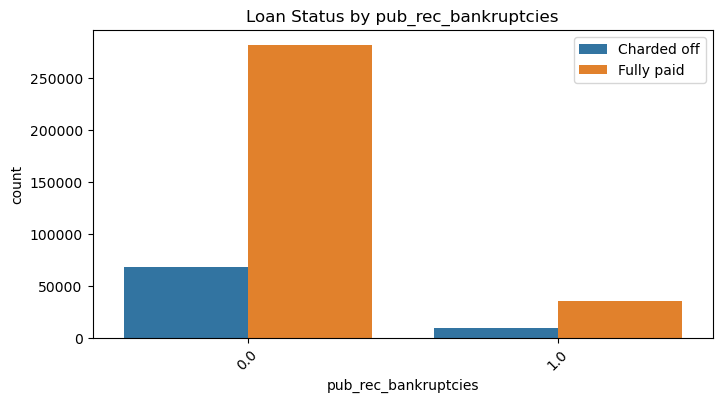

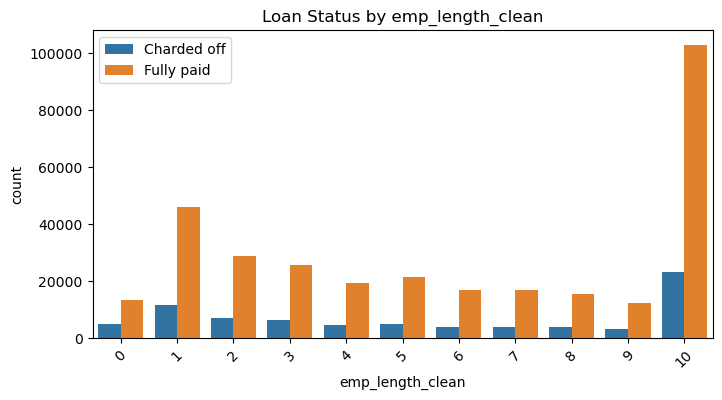

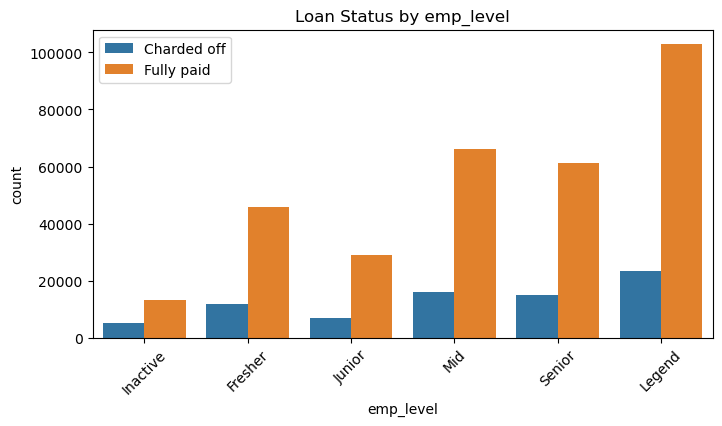

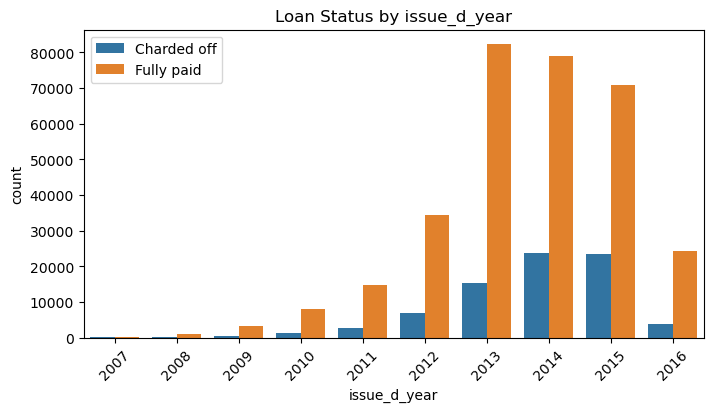

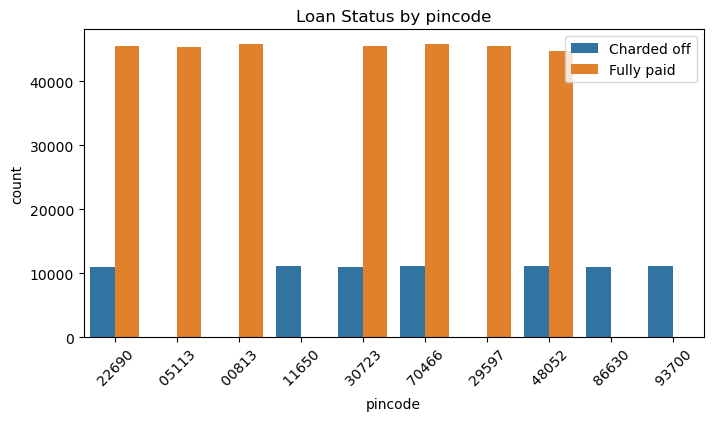

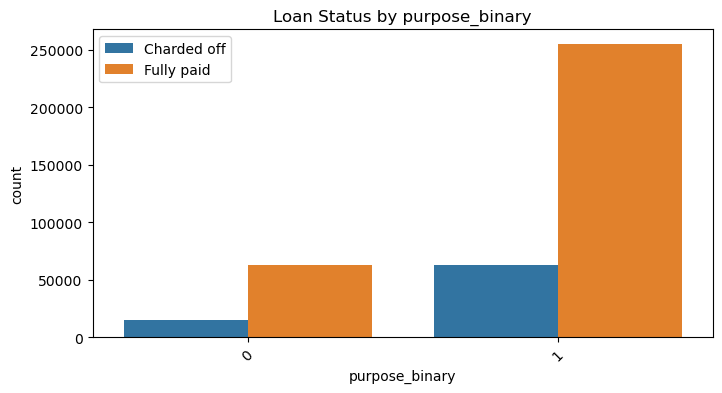

In [59]:
for var in cat_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=var, hue='loan_status', data=data)
    plt.title(f'Loan Status by {var}')
    plt.legend(labels= ['Charded off', 'Fully paid'])
    plt.xticks(rotation= 45)
    plt.show()

In [60]:
## Same as above chart but in 6 X 3 plot

# n = len(cat_cols)

# plt.figure(figsize=(30,20))

# for i, var in enumerate(cat_cols, 1):
#     plt.subplot(3, 6 ,i )
#     sns.countplot(x=var, hue='loan_status', data=data)
#     plt.title(f'Loan Status by {var}')
#     plt.legend(labels= ['Charded off', 'Fully paid'])
#     plt.xticks(rotation= 45)
# plt.tight_layout()
# plt.show()

([0, 1], [Text(0, 0, '0'), Text(1, 0, '1')])

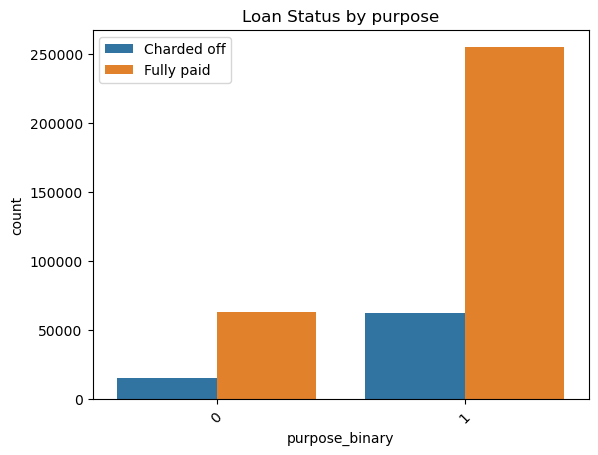

In [61]:
sns.countplot(x='purpose_binary', hue='loan_status', data=data)
plt.title('Loan Status by purpose')
plt.legend(labels= ['Charded off', 'Fully paid'])
plt.xticks(rotation= 45)

## Insights from the above graphs
### 1. **Term**
- Charged-off loans are relatively more common in 60-month terms.
- Loan term is a strong indicator of risk—longer-term loans have higher default probability.

---

### 2. **Grade**
- Lower grades (A, B) show higher repayment rates.
- Higher grades (C, E, D, F, G) have significantly more charged-offs.
- Strongly predictive feature reflecting creditworthiness.
- grades B tend to take more loan comparitivly with A and other grades

---

### 3. **Sub-Grade**
- Provides finer granularity than `grade`, reinforcing the same trend.
- Useful if model benefits from more detailed credit tier segmentation.

---

### 4. **Purpose**
- Certain purposes like **`small_business`** and **`debt_consolidation`** have disproportionately high charge-off rates.
- Strong indicator of loan intent risk.

---

### 5. **Initial List Status**
- Loans listed as "w"- whole loan show a lower charge-off rate compared to "f"- fractional loan.
- May reflect internal credit risk assessment—likely valuable.

---

### 6. **Pub_rec_bankruptcies**
- Interstingly Borrowers with a history of bankruptcies have noticeably more charged-offs.
- Clearly indicates prior financial distress—predictive of risk.

---

### 7. **Emp_level**
- Executive/professional levels show fewer defaults.
- Lower-tier employment levels correlate with higher charge-offs.

---

### 8. **pincode**
- regions that comes under pincode `86630`, `93700` has very high or charged_off rates can be marked as high risk areas.

### **Correlation between independent variables**

In [62]:
print(num_cols)

['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'open_acc', 'revol_bal', 'revol_util', 'total_acc']


In [63]:
num_cols = ['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc', 'verification_status', 
             'loan_status', 'dti', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 
             'initial_list_status', 'application_type', 'mort_acc', 'pub_rec_bankruptcies', "credit_age" ]
num_cols

['loan_amnt',
 'term',
 'int_rate',
 'installment',
 'annual_inc',
 'verification_status',
 'loan_status',
 'dti',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'initial_list_status',
 'application_type',
 'mort_acc',
 'pub_rec_bankruptcies',
 'credit_age']

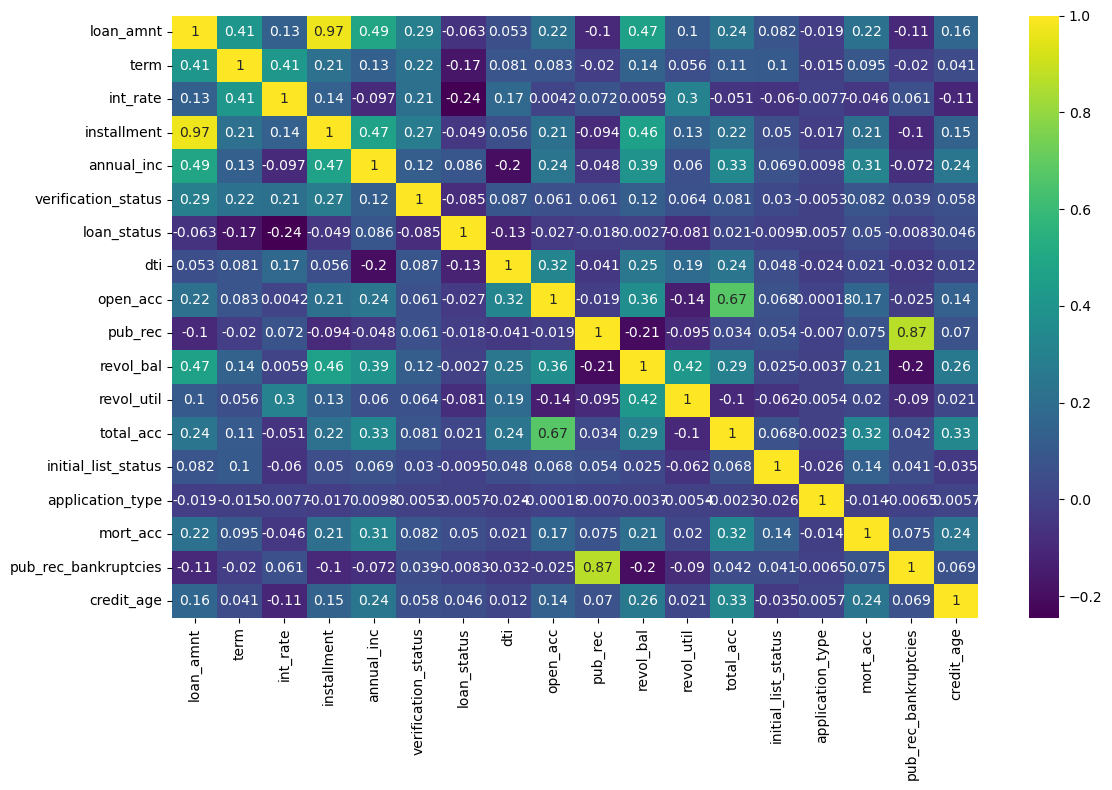

In [64]:

plt.figure(figsize=(12, 8))

sns.heatmap(data[num_cols].corr(method= "spearman"),annot= True, cmap= "viridis" )
plt.tight_layout()
plt.show()

In [65]:
# plt.figure(figsize=(12, 8))

# sns.pairplot(data[num_cols].corr(method= "spearman"))
# plt.tight_layout()
# plt.show()

### 1. **Highly Correlated Features**
- **`loan_amnt` and `installment`**: Very strong positive correlation (**0.97**), which makes sense since the installment amount is usually derived from the loan amount. we can consider dropping one of them to avoid multicollinearity in logistic regression.
- **`pub_rec` and `pub_rec_bankruptcies`**: Very strong positive correlation (**0.87**), indicating redundancy. Again, consider keeping only one of these.

---

### 2. **Moderate Correlations**
- **`loan_amnt`, `installment` vs `revol_bal` and `annual_inc`**: Positive correlations (~0.46–0.49). People with higher income or higher revolving balance may be eligible for higher loan amounts and higher installment values.
- **`open_acc` and `total_acc`**: Moderate correlation (**0.67**), showing a possible structural relationship between total and open accounts.

---

### 3. **Weak or No Correlations**
- **`int_rate` has low correlation** with most variables. This suggests that interest rate might act independently and could still be a good predictor of repayment likelihood.
- **`dti` (Debt-to-Income Ratio)** also shows weak correlation with most variables, which is expected—it combines multiple aspects of debt and income, making it a potential good standalone feature.
- **`initial_list_status`, `application type`** have very least/weak correlation towards loan status.

### Drop features that are highly correlated, not essential, duplicated, feature engineered etc

In [66]:
df = data.drop(labels=[
    'installment', 'pub_rec_bankruptcies', 'emp_length', 'emp_length_clean',
    'earliest_cr_line_year', 'issue_d', 'earliest_cr_line', 'purpose'
], axis=1)

In [67]:
df

,loan_amnt,term,int_rate,grade,sub_grade,home_ownership,annual_inc,verification_status,loan_status,dti,...,revol_util,total_acc,initial_list_status,application_type,mort_acc,emp_level,issue_d_year,credit_age,pincode,purpose_binary
0,10000.0,36,11.44,B,B4,RENT,117000.0,0,1,26.24,...,41.8,25.0,1,1,0.0,Legend,2015,35,22690,0
1,8000.0,36,11.99,B,B5,MORTGAGE,65000.0,0,1,22.05,...,53.3,27.0,0,1,1.0,Mid,2015,21,05113,1
2,15600.0,36,10.49,B,B3,RENT,43057.0,1,1,12.79,...,92.2,26.0,0,1,0.0,Fresher,2015,18,05113,1
3,7200.0,36,6.49,A,A2,RENT,54000.0,0,1,2.60,...,21.5,13.0,0,1,0.0,Senior,2014,19,00813,1
4,24375.0,60,17.27,C,C5,MORTGAGE,55000.0,1,0,33.95,...,69.8,43.0,0,1,1.0,Senior,2013,26,11650,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60,10.99,B,B4,RENT,40000.0,1,1,15.63,...,34.3,23.0,1,1,0.0,Junior,2015,21,30723,1
396026,21000.0,36,12.29,C,C1,MORTGAGE,110000.0,1,1,21.45,...,95.7,8.0,0,1,1.0,Mid,2015,19,05113,1
396027,5000.0,36,9.99,B,B1,RENT,56500.0,1,1,17.56,...,66.9,23.0,0,1,0.0,Legend,2013,28,70466,1
396028,21000.0,60,15.31,C,C2,MORTGAGE,64000.0,1,1,15.88,...,53.8,20.0,0,1,1.0,Legend,2012,35,29597,1


In [68]:
df.to_csv("data_for_model.csv", index= False)

## Time to USE MACHINE LEARNING ALGORITHM TO BUILD A PREDICTIVE MODEL
### Challenge - Heavily Imbalance data AND Presence of Outliers
1. **Adding more weight to the minority class so that the plane which divide can equally classify**
2. Oversampling and UnderSampling methods to balance the data 

In [69]:
## Dividing the dataset into train and test then splitting it using train_test_split

X = df.drop('loan_status', axis= 1)
Y= df['loan_status']

X.columns

Index(['loan_amnt', 'term', 'int_rate', 'grade', 'sub_grade', 'home_ownership',
       'annual_inc', 'verification_status', 'dti', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'application_type', 'mort_acc', 'emp_level', 'issue_d_year',
       'credit_age', 'pincode', 'purpose_binary'],
      dtype='object')

In [70]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.20,random_state=42) #change all the values before unhasing the bottom line code.

# X_train,X_test_cv,y_train,y_test_cv = train_test_split(X_train_cv,y_train_cv,test_size=0.25,random_state=42)

print(X_train.shape)
# print(X_train_cv.shape)
print(X_test.shape)
print(y_train.shape)
# print(y_train_cv.shape)
print(y_test.shape)

(316824, 22)
(79206, 22)
(316824,)
(79206,)


## Preprocessing Data for Model Building

### Label Encoding and One-Hot Encoding

In [71]:
X_train.columns

Index(['loan_amnt', 'term', 'int_rate', 'grade', 'sub_grade', 'home_ownership',
       'annual_inc', 'verification_status', 'dti', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'application_type', 'mort_acc', 'emp_level', 'issue_d_year',
       'credit_age', 'pincode', 'purpose_binary'],
      dtype='object')

- **Label Encoding: `grade`, `sub_grade`,`emp-level`. Since we can assign 1 to n numbers to identify which one is greater.**
- **Target Encoding: `pincode`, `home_ownership` ship**


In [72]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder

label_encoder_grade = LabelEncoder()
# label_encoder_grade.fit(X_train['grade'])

X_train['grade'] = label_encoder_grade.fit_transform(X_train['grade'])
X_test['grade'] = label_encoder_grade.transform(X_test['grade'])

label_encoder_subgrade = LabelEncoder()
# label_encoder_subgrade.fit(X_train['sub_grade'])

X_train['sub_grade'] = label_encoder_subgrade.fit_transform(X_train['sub_grade'])
X_test['sub_grade'] = label_encoder_subgrade.transform(X_test['sub_grade'])


In [73]:
# for emp_level, home_ownership, pincode - we have to coding manually.

## Creating a function for the testing purpose too
def preprocess_emplevel(data, emp_level): 
    data[emp_level] = data[emp_level].replace({
        "Inactive": 0,
        "Fresher": 1,
        "Junior": 2,
        "Mid": 3,
        "Senior": 4,
        "Legend": 5   
    })
    return data

#call function

X_train = preprocess_emplevel(X_train, 'emp_level')
X_test = preprocess_emplevel(X_test, 'emp_level')

In [74]:
import category_encoders as ce  # Import category_encoders

# Initialize and fit the target encoder
encoder = ce.TargetEncoder()

encoding_cols = ['pincode', 'home_ownership']

# Transform both training and testing sets
for col in encoding_cols:
    X_train[col] = encoder.fit_transform(X_train[col], y_train)  # Fit on training data
    X_test[col] = encoder.transform(X_test[col])  # Transform on test data

In [75]:
X_train[['pincode', 'home_ownership']].head()

,pincode,home_ownership
320024,0.800388,0.773580
282427,1.000000,0.830482
103275,1.000000,0.830482
199642,0.800388,0.830482
56027,0.805916,0.773580


<Axes: xlabel='pincode', ylabel='Count'>

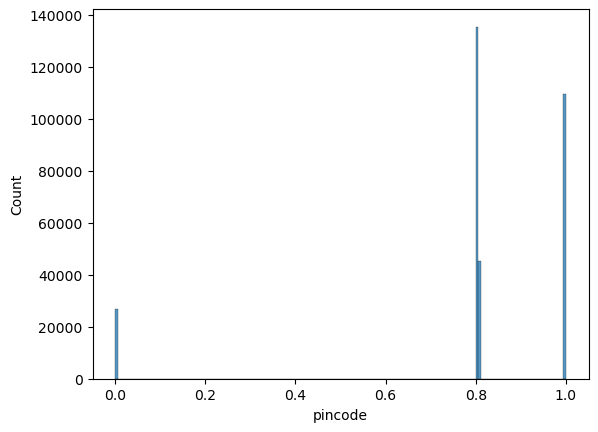

In [76]:
sns.histplot(X_train['pincode'])

<Axes: xlabel='home_ownership', ylabel='Count'>

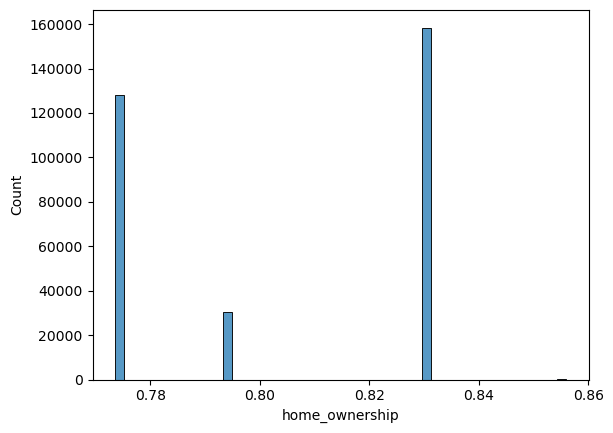

In [77]:
sns.histplot(X_train['home_ownership'])